## Imports

In [1]:
import numpy as np
from glob import glob
import pickle
from scipy import signal
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.optimizers import *

## Data Visualization

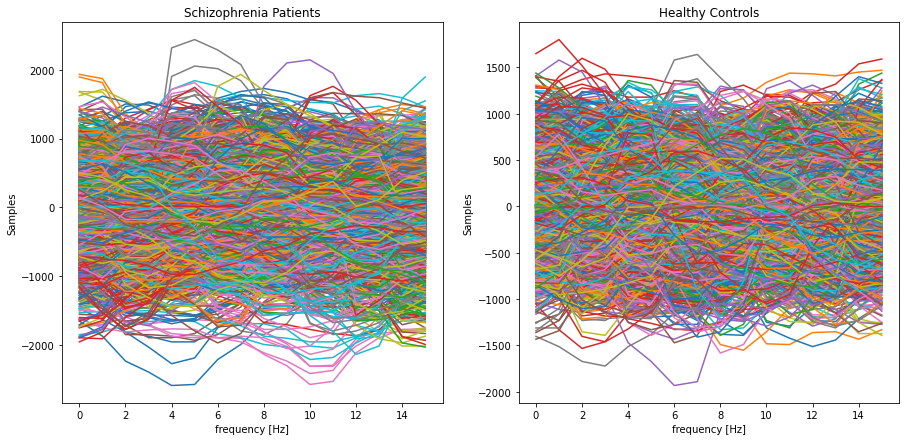

In [3]:
sch=np.loadtxt('sch/088w1.eea')
sch=sch.reshape(-1,16).T
hc=np.loadtxt('norm/S10W1.eea')
hc=hc.reshape(-1,16).T
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
plt.plot(sch)
plt.title("Schizophrenia Patients")
plt.xlabel('frequency [Hz]')
plt.ylabel('Samples')
plt.subplot(1, 2, 2)
plt.plot(hc)
plt.xlabel('frequency [Hz]')
plt.ylabel('Samples')
plt.title("Healthy Controls")
plt.show()

## Analyse a sample data

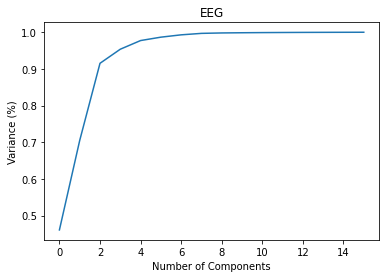

(6, 7680)


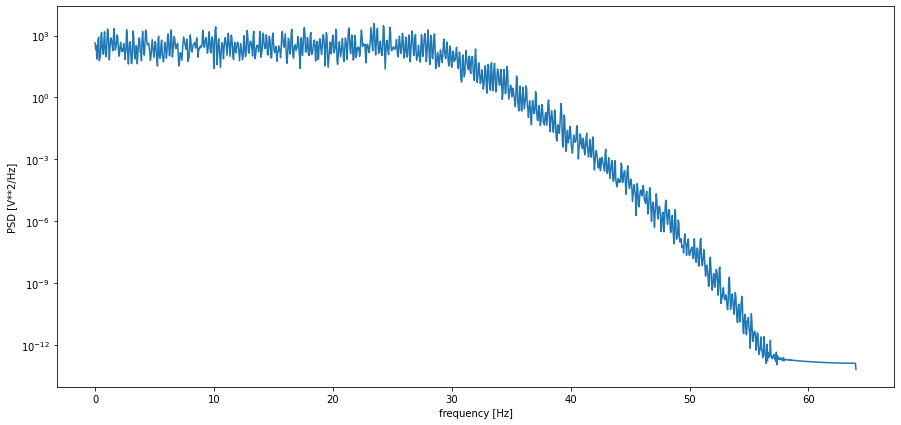

In [4]:
data=np.loadtxt('sch/088w1.eea')
from scipy import signal
nyq = 0.5 * 128
low = 0.1 / nyq
high = 30/ nyq
fs=128
#low freq =0.1
win = 2/0.1 * fs
b, a = signal.butter(5, [low,high], 'band')
data=data.reshape(-1,16).T #datapoints x columns
    # Tranpose is taken becz data should be columns into sample points
data=signal.detrend(data)
data=signal.filtfilt(b, a, data)  

pca = PCA().fit(data.T)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('EEG')
plt.show()

pca=PCA(6)
data=pca.fit_transform(data.T).T
print(data.shape)
plt.figure(figsize=(15,7))
f, Pxx_den = signal.welch(data,fs,nperseg=win )
plt.semilogy(f,Pxx_den[5])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


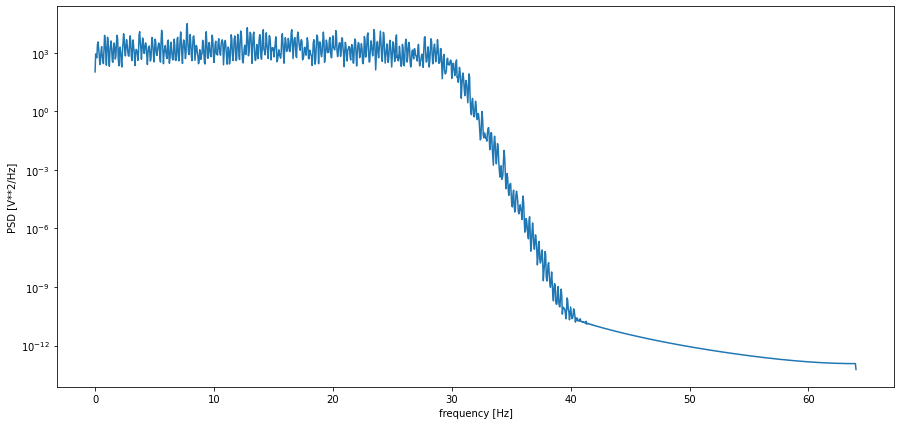

In [5]:
data=np.loadtxt('norm/S10W1.eea')
from scipy import signal
nyq = 0.5 * 128
low = 0.1 / nyq
high = 30 / nyq
b, a = signal.butter(16, high, 'low')
data=data.reshape(-1,16).T #datapoints x columns
    # Tranpose is taken becz data should be columns into sample points
data=signal.detrend(data)
data=signal.filtfilt(b, a, data)  
fs=128
#low freq =0.1
win = 2/0.1 * fs

plt.figure(figsize=(15,7))
f, Pxx_den = signal.welch(data,fs,nperseg=win )
plt.semilogy(f,Pxx_den[0])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


## Read Data

In [6]:
HC_path=glob('norm/*.eea')
SZ_path=glob('sch/*.eea')

In [7]:
nyq = 0.5 * 128
low = 0.1 / nyq
high = 30/ nyq
fs=128

In [8]:
HC=[]#trialxsample x channels
for i in HC_path:
    data=np.loadtxt(i)
    data=data.reshape(-1,16).T #datapoints x columns
    # Tranpose is taken becz data should be columns into sample points
    data=data.reshape(6,-1,512).T
    data=np.swapaxes(data,0,1)
    HC.append(data)

In [9]:
SZ=[]
for i in SZ_path:
    data=np.loadtxt(i)
    data=data.reshape(-1,16).T #datapoints x columns
    # Tranpose is taken becz data should be columns into sample points
    data=data.reshape(6,-1,512).T
    data=np.swapaxes(data,0,1)
    SZ.append(data)

In [10]:
HC[0].shape,SZ[0].shape

((15, 512, 6), (15, 512, 6))

## Feature Calculation

In [21]:
from scipy import stats
import pyeeg
from entropy import *
def mean(data):
    return np.mean(data,axis=0)
    
def std(data):
    return np.std(data,axis=0)

def ptp(data):
    return np.ptp(data,axis=0)

def var(data):
        return np.var(data,axis=0)

def minim(data):
      return np.min(data,axis=0)


def maxim(data):
      return np.max(data,axis=0)


def mean_square(data):
      return np.mean(data**2,axis=0)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=0))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)


def skewness(data):
    return stats.skew(data,axis=0)

def kurtosis(data):
    return stats.kurtosis(data,axis=0)

def zero_crossing(data):
    return np.argmax(np.diff(np.sign(data),axis=0),axis=0)





        




def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data),zero_crossing(data)),
                         
                          axis=0)

In [22]:
features1=[]
for f in HC:
    feature=[]
    for i in f:
    features1.append(np.mean(np.array(feature),axis=0))
    

In [23]:

features2=[]
for f in SZ:
    feature=[]
    for i in f:
    features2.append(np.mean(np.array(feature),axis=0))

In [24]:
x1=np.array(features1)        
x2=np.array(features2)      

X_all=np.concatenate((x1,x2),axis=0)
y_all=np.concatenate(((np.zeros(x1.shape[0])),(np.ones(x2.shape[0]))))

# Classification

## Traditional Algorithms

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,test_size=0.3, random_state=42,stratify=y_all)

## Decision Tree

In [51]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=42)
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Testing acc=",clf.score(X_test,y_test)*100)

print("Training acc=",clf.score(X_train,y_train)*100)

Testing acc= 96.15384615384616
Training acc= 100.0


C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 46 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


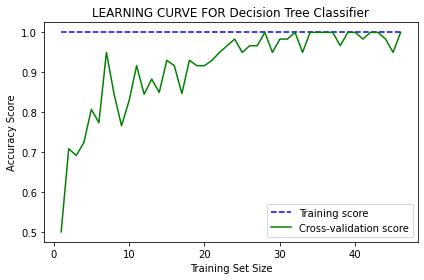

In [52]:
sizes, training_scores, testing_scores = learning_curve(DecisionTreeClassifier(), X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR Decision Tree Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Accuracy Score (Decision Tree) : 96')

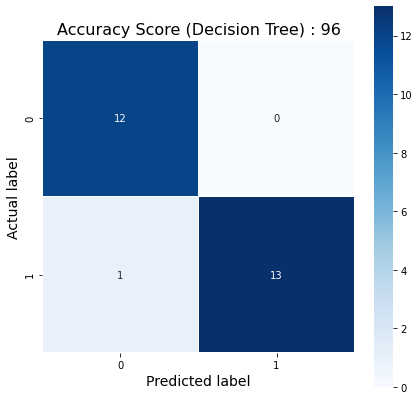

In [84]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label',size = 14)
plt.xlabel('Predicted label', size = 14)
acc = (clf.score(X_test, y_test)*100)
acc1 = int(acc)
all_sample_title = 'Accuracy Score (Decision Tree) : {0}'.format(acc1)
plt.title(all_sample_title, size = 16)

In [55]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2}
Best score is 0.9651515151515152


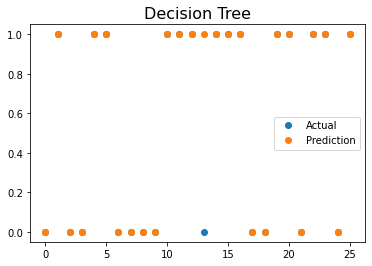

In [56]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.title("Decision Tree", size =16)
plt.legend()

## Random Forest

In [86]:
clf = RandomForestClassifier(n_estimators=100, random_state=43)
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Testing acc=",clf.score(X_test,y_test)*100)

print("Training acc=",clf.score(X_train,y_train)*100)

Testing acc= 96.15384615384616
Training acc= 100.0


C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 46 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


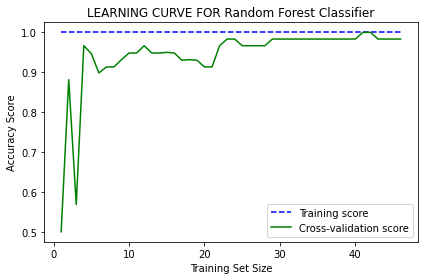

In [60]:
sizes, training_scores, testing_scores = learning_curve(RandomForestClassifier(), X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR Random Forest Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Accuracy Score (Random Forest) : 96')

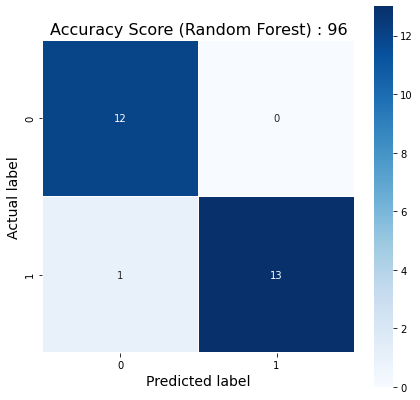

In [87]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label',size = 14)
plt.xlabel('Predicted label', size = 14)
acc = (clf.score(X_test, y_test)*100)
acc1 = int(acc)
all_sample_title = 'Accuracy Score (Random Forest) : {0}'.format(acc1)
plt.title(all_sample_title, size = 16)

In [62]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
  
tune = RandomForestClassifier()
  
# Instantiating RandomizedSearchCV object
tune_cv = RandomizedSearchCV(tune, param_dist, cv = 5)
  
tune_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(tune_cv.best_params_))
print("Best score is {}".format(tune_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}
Best score is 0.9833333333333332


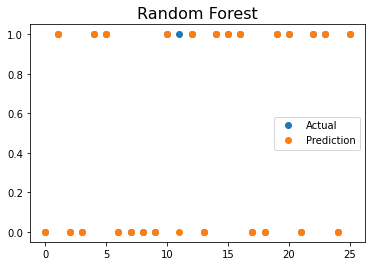

In [63]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.title("Random Forest", size =16)
plt.legend()

## SVC

In [124]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
clf=SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('accuracy is ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        12
         1.0       1.00      0.93      0.96        14

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

accuracy is  0.9615384615384616


C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 46 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "
C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 558, in _validate_targets
    raise Va

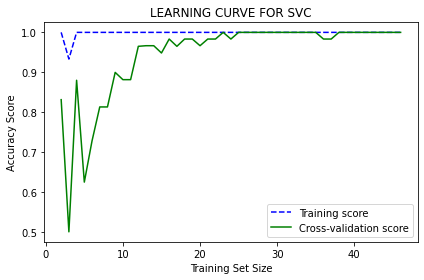

In [65]:
sizes, training_scores, testing_scores = learning_curve(SVC(), X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR SVC")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Accuracy Score (SVC) : 100     ')

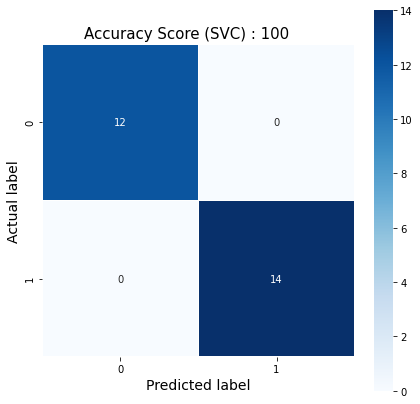

In [96]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label', size = 14)
plt.xlabel('Predicted label', size = 14)
acc = (clf.score(X_test, y_test)*100)
acc1 = int(acc)
all_sample_title = 'Accuracy Score (SVC) : {0}     '.format(acc1)
plt.title(all_sample_title, size = 15)

In [69]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
  
# Instantiating Decision Tree classifier
tune = SVC()
  
# Instantiating RandomizedSearchCV object
tune_cv = RandomizedSearchCV(tune, param_dist, cv = 5)
  
tune_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned SVC Parameters: {}".format(tune_cv.best_params_))
print("Best score is {}".format(tune_cv.best_score_))

Tuned SVC Parameters: {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}
Best score is 1.0


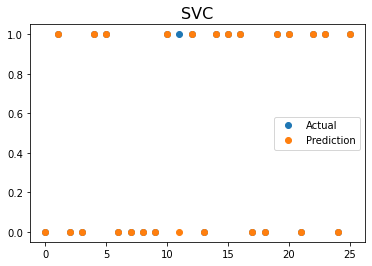

In [125]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.title("SVC", size =16)
plt.legend()

## Logistic Regression

In [126]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [127]:
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('accuracy is ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

accuracy is  1.0


In [119]:
# Creating the hyperparameter grid 
c_space = np.logspace(-5, 8, 15)
param_dist = {'C': c_space}
  
# Instantiating Decision Tree classifier
tune = LogisticRegression()
  
# Instantiating RandomizedSearchCV object
tune_cv = RandomizedSearchCV(tune, param_dist, cv = 5)
  
tune_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(tune_cv.best_params_))
print("Best score is {}".format(tune_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 19306.977288832535}
Best score is 1.0


C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 49 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "
C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, 

C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters wi

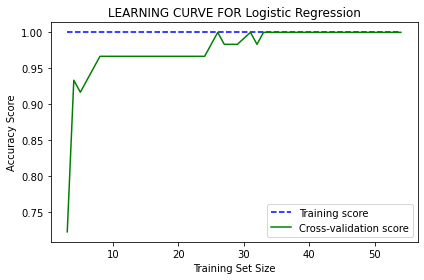

In [74]:
sizes, training_scores, testing_scores = learning_curve(LogisticRegression(), X_train, y_train, cv=15, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR Logistic Regression")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Accuracy Score (Logistic Regression) : 100')

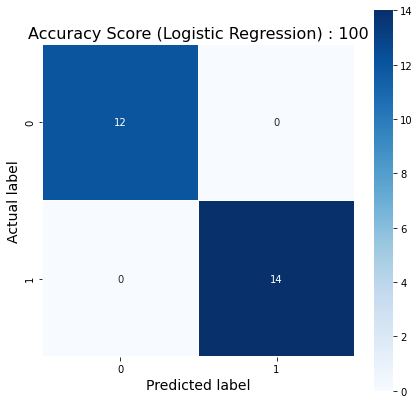

In [93]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label', size = 14)
plt.xlabel('Predicted label', size = 14)
acc = (clf.score(X_test, y_test)*100)
acc1 = int(acc)
all_sample_title = 'Accuracy Score (Logistic Regression) : {0}'.format(acc1)
plt.title(all_sample_title, size = 16)

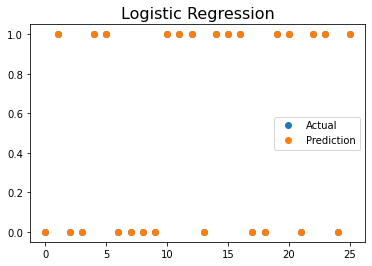

In [128]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.title("Logistic Regression", size =16)
plt.legend()

## KNN

In [129]:
clf = KNeighborsClassifier(n_neighbors=1)
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Testing acc=",clf.score(X_test,y_test)*100)

print("Training acc=",clf.score(X_train,y_train)*100)

Testing acc= 96.15384615384616
Training acc= 100.0


C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 46 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "
C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236

C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\neighbors\_

C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\neighbors\_

C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\neighbors\_

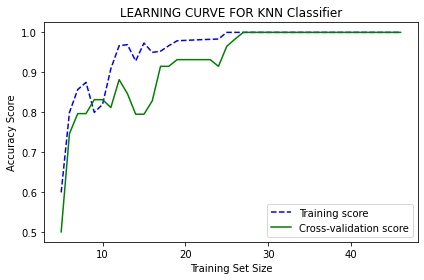

In [78]:
sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Accuracy Score (KNN) : 96     ')

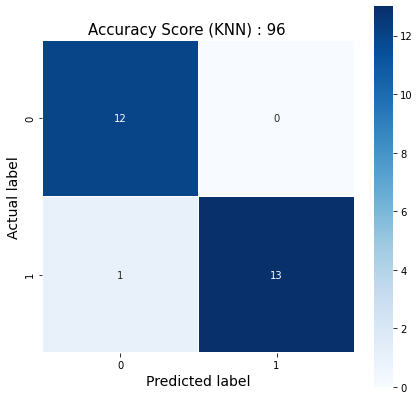

In [122]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label', size = 14)
plt.xlabel('Predicted label', size =14)
acc = (clf.score(X_test, y_test)*100)
acc1 = int(acc)
all_sample_title = 'Accuracy Score (KNN) : {0}     '.format(acc1)
plt.title(all_sample_title, size = 15)

In [123]:
# Creating the hyperparameter grid 
param_dist = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
  
# Instantiating Decision Tree classifier
tune =  KNeighborsClassifier()
  
# Instantiating RandomizedSearchCV object
tune_cv = RandomizedSearchCV(tune, param_dist, cv = 5)
  
tune_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(tune_cv.best_params_))
print("Best score is {}".format(tune_cv.best_score_))

Tuned KNN Parameters: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'minkowski'}
Best score is 1.0


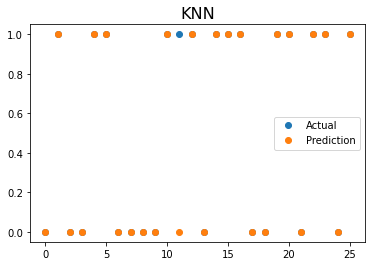

In [130]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.title("KNN", size =16)
plt.legend()

In [34]:
X = np.array(X_train)
y = np.array(y_train)
X_t = np.array(X_test)
y_t = np.array(y_test)
X.shape

(58, 72)

In [44]:
X= X.reshape(58,72,1)
X_t= X_t.reshape(26,72,1)
y_t= y_t.reshape(26,1)
#y=y.reshape(58,1)
y.shape

(58,)

In [37]:
model2 = Sequential()
model2.add(LSTM(64, return_sequences=True,
               input_shape=(72, 1)))  # returns a sequence of vectors of dimension 32
model2.add(Dropout(0.5))
model2.add(LSTM(32, return_sequences=True))  # return a single vector of dimension 32
model2.add(LSTM(32))

model2.add(Dense(1, activation='sigmoid'))

mc_test = ModelCheckpoint('best_test_model.h5', monitor='accuracy', mode='max', verbose = 1, save_best_only=True)
mc_val = ModelCheckpoint('best_val_model.h5', monitor='val_accuracy', mode='max', verbose = 1, save_best_only=True)  #Save best model accuracy
opt = Adam(lr=0.01, decay=0.001);
model2.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [38]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 72, 64)            16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 72, 64)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 72, 32)            12416     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 37,665
Trainable params: 37,665
Non-trainable params: 0
_________________________________________________________________


In [39]:
history2 = model2.fit(X, y, validation_split = 0.3, epochs = 40, batch_size = 5, callbacks=[mc_test, mc_val])  # Train for 40 epochs on 70% of the data

Epoch 1/40
8/8 [==============================] - ETA: 0s - loss: 0.4729 - accuracy: 0.7250
Epoch 00001: accuracy improved from -inf to 0.72500, saving model to best_test_model.h5

Epoch 00001: val_accuracy improved from -inf to 0.88889, saving model to best_val_model.h5
8/8 [==============================] - 3s 427ms/step - loss: 0.4729 - accuracy: 0.7250 - val_loss: 0.2983 - val_accuracy: 0.8889
Epoch 2/40
8/8 [==============================] - ETA: 0s - loss: 0.3805 - accuracy: 0.8250
Epoch 00002: accuracy improved from 0.72500 to 0.82500, saving model to best_test_model.h5

Epoch 00002: val_accuracy improved from 0.88889 to 0.94444, saving model to best_val_model.h5
8/8 [==============================] - 1s 84ms/step - loss: 0.3805 - accuracy: 0.8250 - val_loss: 0.1905 - val_accuracy: 0.9444
Epoch 3/40
8/8 [==============================] - ETA: 0s - loss: 0.2266 - accuracy: 0.8750
Epoch 00003: accuracy improved from 0.82500 to 0.87500, saving model to best_test_model.h5

Epoch 000

In [41]:
y_pred = model2.predict(X_t)
y_pred = (y_pred > 0.5)

Text(0.5, 1.0, 'Accuracy Score (LSTM)  : 1.0 ')

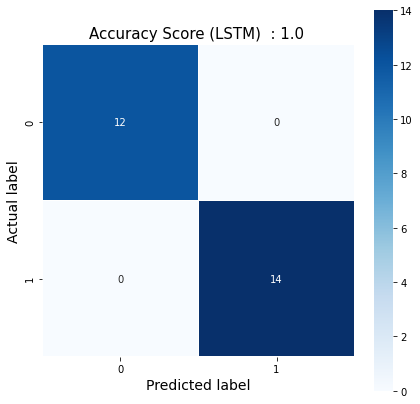

In [98]:
cm = confusion_matrix(y_t, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label', size = 14)
plt.xlabel('Predicted label', size =14)
_, overall_acc = model2.evaluate(X_t, y_t, verbose=0)
all_sample_title = 'Accuracy Score (LSTM)  : {0} '.format(overall_acc)
plt.title(all_sample_title, size = 15)

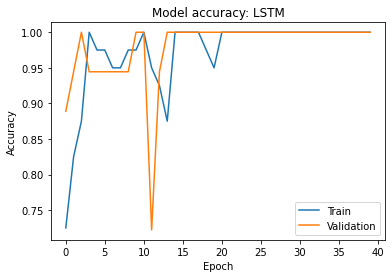

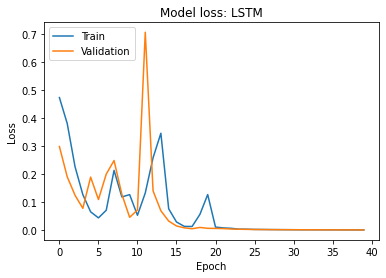

In [40]:
#Plot values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy: LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss: LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

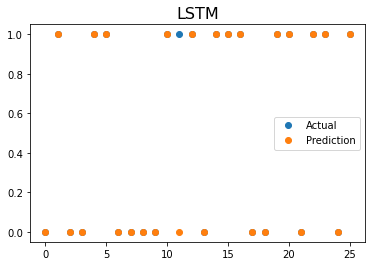

In [131]:
plt.plot(y_t, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.title("LSTM", size =16)
plt.legend()

In [134]:
model = Sequential()
model.add(Dense(12, input_shape=(58,72), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train,validation_split = 0.3, epochs=30, batch_size=30)
# acc = model.evaluate(X_test, y_test)
# training_accuracy = model.evaluate(X_train, y_train)[1]
# print("Training acc=",training_accuracy*100)
# acc
_, overall_acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on total data set: %.3f' % (overall_acc))

Epoch 1/30
2/2 [==============================] - 0s 106ms/step - loss: 0.8127 - accuracy: 0.4250 - val_loss: 0.5561 - val_accuracy: 0.7778
Epoch 2/30
2/2 [==============================] - 0s 13ms/step - loss: 0.7611 - accuracy: 0.4500 - val_loss: 0.5276 - val_accuracy: 0.8333
Epoch 3/30
2/2 [==============================] - 0s 13ms/step - loss: 0.7175 - accuracy: 0.5000 - val_loss: 0.5008 - val_accuracy: 0.8333
Epoch 4/30
2/2 [==============================] - 0s 14ms/step - loss: 0.6758 - accuracy: 0.5500 - val_loss: 0.4742 - val_accuracy: 0.8333
Epoch 5/30
2/2 [==============================] - 0s 10ms/step - loss: 0.6362 - accuracy: 0.5750 - val_loss: 0.4493 - val_accuracy: 0.8333
Epoch 6/30
2/2 [==============================] - 0s 11ms/step - loss: 0.6019 - accuracy: 0.6000 - val_loss: 0.4243 - val_accuracy: 0.8333
Epoch 7/30
2/2 [==============================] - 0s 12ms/step - loss: 0.5686 - accuracy: 0.6000 - val_loss: 0.4018 - val_accuracy: 0.8333
Epoch 8/30
2/2 [==========

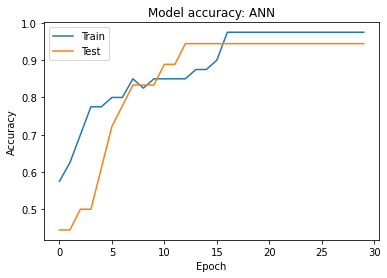

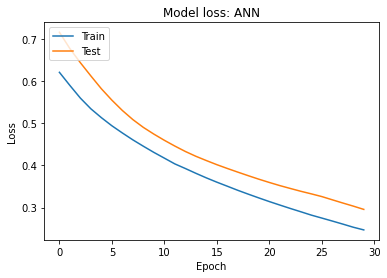

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy: ANN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss: ANN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [135]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

Text(0.5, 1.0, 'Accuracy Score (ANN)  : 84 ')

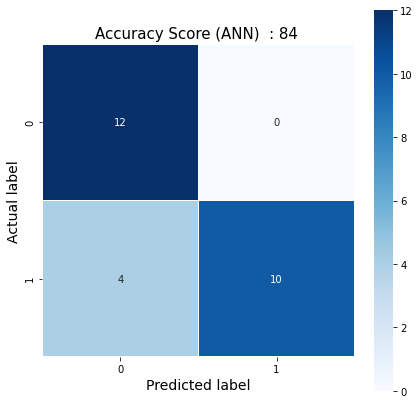

In [136]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label',size =14)
plt.xlabel('Predicted label',size = 14)
_, overall_acc = model.evaluate(X_test, y_test, verbose=0)
acc=(overall_acc)*100
acc1 = int(acc)
all_sample_title = 'Accuracy Score (ANN)  : {0} '.format(acc1)
plt.title(all_sample_title, size = 15)

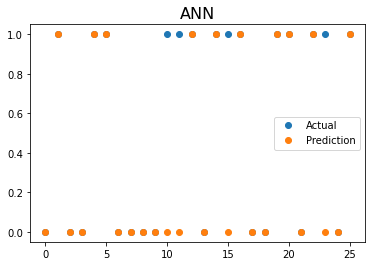

In [137]:
plt.plot(y_t, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.title("ANN", size =16)
plt.legend()

In [138]:
accuracy = [96,96,100,96,100,84,100]

Text(0.5, 1.0, 'Classifiers')

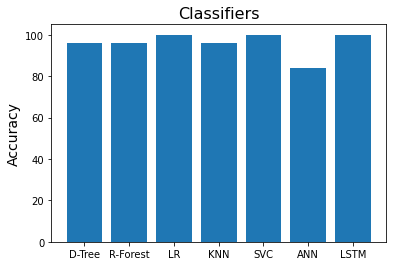

In [141]:
classifier=['D-Tree', 'R-Forest', 'LR', 'KNN', 'SVC', 'ANN', 'LSTM']
y_pos = np.arange(len(classifier))
plt.bar(y_pos,np.array(accuracy))
plt.xticks(y_pos, classifier)
plt.ylabel('Accuracy', size = 14)
plt.title('Classifiers',size=16)